In [10]:
# Packages
import pickle
import nltk
import wordcloud
import matplotlib.pyplot as plt

In [6]:
# Load data
super_hero_dict = pickle.load( open( "../Data/super_hero_dict_formatted.pickle", "rb" ) )

# Part 2: TF-TR

In this part the TF-TR method will be utilized and used for creating word-clouds that characterizes the two comic-book universes. 

The TF-TR method is a way to weighting words in a text in order to retrieve information about the text. The first part is to calculate the Term Frequency (TF) which is given as the number of times a word occurs in a text. The result of calculating the TF gives the most common words in a text but they are not necessarily the most important ones. Thus, the TF information must be weighted which constitutes the second part of this method. In this part of the assignment, the weighting is done using Term Ratios (TR). For the two universes, the TR for a term $t$ with term frequency $TF_t^{(u)}$, where universe $u \in \{m, d\}$ is defined as 

$$w_t^{(m)} = \frac{TF_t^{(m)}}{TF_t^{(d)}+c}, \quad w_t^{(d)} = \frac{TF_t^{(d)}}{TF_t^{(m)}+c},$$
where $c$ is a constant which ensures the avoidance of division by zero. When creating these ratios, it is assumed that the universes have a comparable number of words.

With this, a TF-TR list for each universe can be created where the ranking of term $t$ in universe $u$ is given by $TF_t^{(u)} \times w_t^{(u)}$.

These lists will then be used for creating the so-called TF-TR word-clouds.

**Create your own version of the TF-TR word-clouds. Explain your process and comment on your results.**

Using the dictionary containing all superheroes in both universes with corresponding wiki-texts, two lists are created for separating the universes.  

In [ ]:
# Make lists of wikitext for both universes
marvel_list = []
dc_list = []

for super_hero in super_hero_dict:
    if super_hero_dict[super_hero]['Universe'] == 'Marvel':
        if super_hero_dict[super_hero]['Wiki_text'] != None:
            marvel_list.append(super_hero_dict[super_hero]['Wiki_text'])
            
    elif super_hero_dict[super_hero]['Universe'] == 'DC':
        if super_hero_dict[super_hero]['Wiki_text'] != None:
            dc_list.append(super_hero_dict[super_hero]['Wiki_text'])

Each wiki-text in the universe are tokenized into individual strings using the `RegexpTokenizer`. This tokenizer ensures that all punctuation are removed from the texts. In addition, every word is set to lowercase. 

In [ ]:
# Tokenize the pages into individual strings and remove all punctuation from the list of tokens
tokenizer = nltk.RegexpTokenizer(r'\w+')

tokens_marvel = tokenizer.tokenize(" ".join([i for i in marvel_list if i is not None]).lower())
tokens_dc = tokenizer.tokenize(" ".join([i for i in dc_list if i is not None]).lower())

The term frequency of each word is calculated using the `FreqDist` function which output a dictionary with the words as keys and the corresponding values are the number of times each term occurs. This is similar to doing a raw count of each word. 

In [8]:
# Term frequency
TF_marvel = nltk.FreqDist(tokens_marvel)
TF_dc = nltk.FreqDist(tokens_dc)

The TF-TR lists are created as dictionaries and the constant $c$ is set to 25 (quick math on formulas given for the term wolverine in week 7). 

In [9]:
# Union all words
words = set(TF_marvel.keys()).union(set(TF_dc.keys()))

TF_TR_marvel = {}
TF_TR_dc = {}
c = 25
for word in words:
    TF_TR_marvel[word] = (TF_marvel[word])/(TF_dc[word] + c)
    TF_TR_dc[word] = (TF_dc[word])/(TF_marvel[word]+ c)

The TF-TR word-clouds is now created using the `wordcloud` package. The cloud are colored with the color themes of the universes. I.e. the DC cloud is blue and the Marvel cloud is red. 

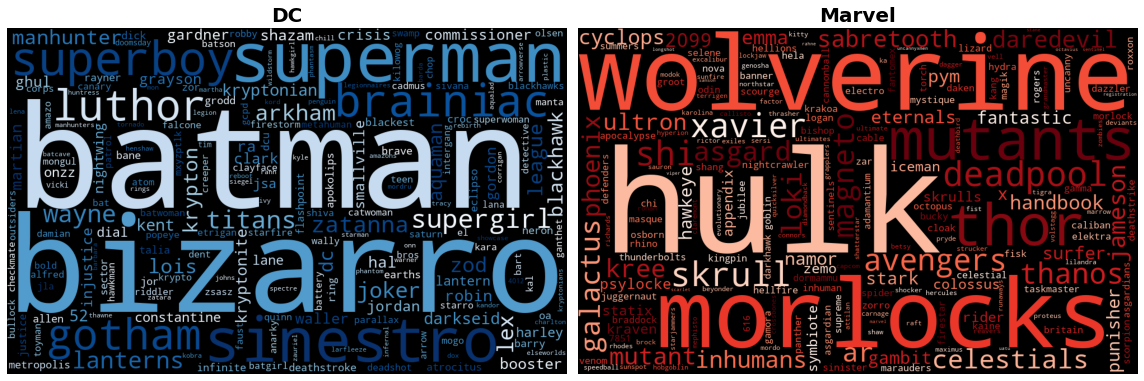

In [45]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize = (16,20))
word_cloud_dc = wordcloud.WordCloud(
    colormap = 'Blues',
    background_color = 'black',
    random_state = 2,
    width = 1000,
    height = 618
)
word_cloud_dc.generate_from_frequencies(TF_TR_dc)
plt.subplot(1, 2, 1)
plt.imshow(word_cloud_dc)
plt.axis('off')
plt.title('DC', fontsize = 20, fontweight='bold')

word_cloud_marvel = wordcloud.WordCloud(
    colormap = 'Reds',
    background_color = 'black',
    random_state = 2,
    width = 1000,
    height = 618
)
word_cloud_marvel.generate_from_frequencies(TF_TR_marvel)
plt.subplot(1, 2, 2)
plt.imshow(word_cloud_marvel)
plt.axis('off')
plt.title('Marvel', fontsize = 20, fontweight='bold')

plt.show()

From the word-clouds it is seen that some of the important words in the DC universe is Batman, Bizarro and Superman etc. This is consistent with what you probably associates the DC universe with. Likewise, some of the important words in the Marvel universe are Wolverine, Hulk and Morlocks.  